# AMAT502:  Lecture 23. Inverse problems. 

April 6, 2019.

Michael Lamoureux

In [2]:
## Some startup commands

%matplotlib inline
from numpy import * 
from scipy import *
from math import tau
from matplotlib.pyplot import *

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import *
from matplotlib import cm


## Assignment 4

We ran over the solutions to Assignment 4. Solutions posted on Github.

## Inverse Problems

Basic idea. Measure some data, deduce something about something "hidden."

#### Examples.

1. Record positions and times of a falling object. Use this to determine acceleration due to gravity. (Can do this to an accuracy of 1 part in a billion.)

2. Record electrical conductivity of an object: human body, a lump of dirt, the ground near the surface of the earth that has been contaminated with an oil spill or something. Use this to create an image (of what's inside the human body, or what's in the dirt.)

3. Record adsorbtion of X-rays going through the human body (CT scan) or through some material like a wall or a bridge (non-destructive testing). Create an image of what is inside, without having to cut anything open.

#### Basic set up

Model m = some physical parameters of some system

Data d = data from some measurements

We assume the physics is understood well enough that we can describe the process of going from model m to data d. THis gives an operator G with
$$d = G(m).$$
In real life, there is always noise in the data, so we might write
$$d = G(m_{true}) + \eta \,(noise).$$

1. Given m, can we find d? (This is the **Forward Problem.**)
2. Given d, can we find m? (This is the **Inverse Problem.**)
3. Given m and d, can we find G? (This is the **Systems Identification Problem.**)

Today we are mainly interested in **Inverse Problems.**


## Categories of inverse problems

1. Discrete problems. Data d and model m are finite vectors. If number of components in m is small, it is called a **parameter estimation problem.**

2. Continuous problems. When m,d are functions of space and time. For instance, our model might be the density of the earth (or of the human body). The model $m = m(x,y,z)$ is a function of space, not just a vector. 

The process of going from continuous to a discrete approximation is an important option in solving these problems.

3. Linear systems. When the operator $G$ is linear.
 - $G(m_1 + m_2) = G(m_1) + G(m_2).$
 - $G(\alpha m) = \alpha G(m).$
 
 
### Linear examples

1. Kernel operators
$$d(x) = \int_a^b g(x,y)m(y) dy.$$

2. Convolution operators
$$d(x) = \int_{-\infty}^\infty g(x-y)m(y) dy.$$
Leads to a deconvolution problem. Important in seismic imaging, radar imaging, and more

3. Fourier transforms
$$F(f)(\omega) = \int_{-\infty}^\infty f(x)e^{2\pi i x\omega}  dx.$$
In the FT case, you often have only partial information, still want to recover the function $f(x)$ as best you can. 

These examples come up in medical imaging, geophysical imaging, non-destructive testing. All kinds of mathematical modelling problems.

## Real example. Falling object

An projectile will follow a parabolic path, and you can write down height as a function of time via 
$$y(t) = m_1 + m_2 t + \frac{1}{2} m_3 t^2.$$
Here, the parameters $m_1,m_2,m_3$ are the model parameters. The data collected will be a sequence pairs of time samples and heights, $(t_i,y_i), as measured while the object falls. 

This can be put into matrix form
$$
\left[
\begin{array}{ccc}
1 & t_1 & -\frac{1}{2} t_1^2 \\
1 & t_2 & -\frac{1}{2} t_2^2 \\
1 & t_3 & -\frac{1}{2} t_3^2 \\
\vdots & \vdots & \vdots \\
1 & t_1 & -\frac{1}{2} t_1^2 \\
\end{array}
\right]
\left[
\begin{array}{c}
m_1 \\
m_2 \\
m_3
\end{array}
\right]
=
\left[
\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_n
\end{array}
\right].
$$

This is a linear system, and we can write as $G \mathbf{m} = \mathbf{y}$. The $y$ are the data, and the $m$ are model parameters we wish to estimate. ($m_3$ will be acceleration due to gravity, the one we are really interested in.)

This linear system is over-determined, so in general we cannot expect an exact solution. We could, however, choose the best fitting parameters.

### Least squares:

Minimize$_m$ $|| \mathbf{y} - G\mathbf{m} ||_2$,
where this el-2 norm is given as 
$$ || \mathbf{y} - G\mathbf{m} ||_2 = \sqrt{\sum_{i=1}^n |y_i - (G\mathbf{m})_i|^2} ,$$
which is the usual Euclidean distance, or norm.

You may have seen this before in Linear Algebra or a Statistics course. The Least Square Minimum is found via the **normal equation** with solution
$$\hat{\mathbf{m}} = (G^TG)^{-1} G^T \mathbf{y}.$$
Here, $G^T$ means the transpose of the matrix $G$. In our example above with the falling object, the matrix $G^TG$ is a 3 x 3 matrix, so easy to invert.

### L1 minimization

Minimize$_m$ $|| \mathbf{y} - G\mathbf{m} ||_1$,
where this el-1 norm is given as 
$$ || \mathbf{y} - G\mathbf{m} ||_1 = \sum_{i=1}^n |y_i - (G\mathbf{m})_i| ,$$
which is the usual Euclidean distance, or norm.

It turns out the L1 minimization is more robust, and does a good job of ignoring outliers. It is good with noise that is not Gaussian, but has **fat tails.**

However, there is nothing like the normal equations to solve this. You need to use an numerical algorithm to minimize this. This we why we learned about minimization techniques in the last few lectures.

## Well-posedness of an inverse problem
- does a solution exist?
- is the solution unique?
- is the solution stable with respect to small changes in the data? (e.g. like noise)

If we have these 3 properties, we say the problem is **well-posed.** If not, it is ill-posed. In that case, we have to reformulate the problem into something that is well-posed. This could mean adding regularization, or adding more information to the problem, to make it well posed.

## Next time.

In the next lecture, we will talk about singular value decomposition, and how we can use it to stablizer difficult inverse problems.

We will look at examples as well.








## The falling object problem.

Let's see if we can do some simple minimization to find a solution to the falling object problem.

We define a function $f$ to describe the parabola of the falling object.

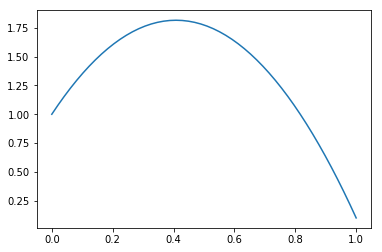

In [97]:
def f(t,m):
    return m[0] + m[1]*t + 0.5*m[2]*t**2

t = linspace(0,1)

m = [1,4,-9.8]
plot(t,f(t,m));



Now we create a model and some data, to get the matrix G

In [98]:
len = 10
m_true = [1,4,-9.8]
tk = linspace(0,1,len)
y = f(tk,m_true)
G = zeros((len,3))
G[:,0] = ones(len)
G[:,1] = tk
G[:,2] = 0.5*tk**2
G



array([[1.        , 0.        , 0.        ],
       [1.        , 0.11111111, 0.00617284],
       [1.        , 0.22222222, 0.02469136],
       [1.        , 0.33333333, 0.05555556],
       [1.        , 0.44444444, 0.09876543],
       [1.        , 0.55555556, 0.15432099],
       [1.        , 0.66666667, 0.22222222],
       [1.        , 0.77777778, 0.30246914],
       [1.        , 0.88888889, 0.39506173],
       [1.        , 1.        , 0.5       ]])

Now we solve using the normal equations.

In [99]:
linalg.inv(transpose(G)@G)@transpose(G)@y

array([ 1. ,  4. , -9.8])

Notice the solution is exact. But that is because we had no noise.

## Better test

We should try adding some noise to the data y. randn is normally distributed noise, added in below.



In [100]:
m_best = linalg.inv(transpose(G)@G)@transpose(G)@(y + .2*randn(len))
m_best

array([ 0.79207679,  3.62488394, -8.39771092])

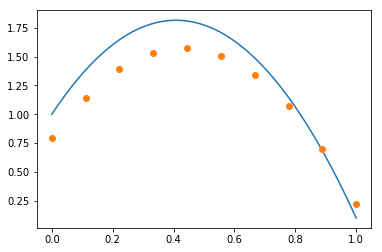

In [110]:
plot(t,f(t,m_true),tk,f(tk,m_best),'o');

In [107]:
from scipy.optimize import fmin_cg,fmin_bfgs

len = 10
m_true = [1,4,-9.8]
tk = linspace(0,1,len)
y = f(tk,m_true) +0*randn(len)
G = zeros((len,3))
G[:,0] = ones(len)
G[:,1] = tk
G[:,2] = 0.5*tk**2


def fnorm1(m):
    return sum(abs(y - G@m))

m_best2 = fmin_cg(fnorm1, [1,4,-9.5])
m_best2

         Current function value: 0.086968
         Iterations: 5
         Function evaluations: 342
         Gradient evaluations: 68


array([ 1.02072861,  3.88242558, -9.56619713])

In [116]:
fmin_bfgs(fnorm1, [0,0,0])

         Current function value: 0.000000
         Iterations: 36
         Function evaluations: 637
         Gradient evaluations: 126


array([ 0.99999999,  4.00000004, -9.80000011])

         Current function value: 0.000000
         Iterations: 36
         Function evaluations: 637
         Gradient evaluations: 126


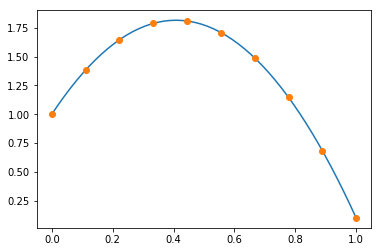

In [115]:
m_best3 = fmin_bfgs(fnorm1, [0,0,0])
plot(t,f(t,m_true),tk,f(tk,m_best3),'o');

## Wow!  Pretty good. Better check I did this right!!